<a href="https://colab.research.google.com/github/MarManja/SP/blob/main/Regresi%C3%B3n_lineal_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar archivo csv desde el equipo
from google.colab import files
files.upload()

In [ ]:
#¢Convertir en detaframe
data=pd.read_csv("limpio_y_PROCESADO.csv")
data.head(5)

In [ ]:
#Verificamos información del DataFrame
data.info()

In [ ]:
#Filtro para obtener variables
data2=data.iloc[ : , [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]]
data2

In [ ]:
#Verificamos información del nuevo DataFrame
data2.info()

In [ ]:
#Filtro para obtener variables
data3=data2.iloc[ : , [29,30,31,32,33,34,35]]
data3

In [24]:
#Verificamos información del nuevo DataFrame
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 7 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   Equipo del entrevistador                                                                             1166 non-null   int64  
 1   ¿Cuántos productos aproximadamente maneja en su tienda?                                              1166 non-null   float64
 2   ¿Cuántos clientes, en promedio, recibe en un día entre semana?                                       1166 non-null   float64
 3   ¿Cuántos clientes, en promedio, recibe en un día del fin de semana?                                  1166 non-null   float64
 4   En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?  1166 non

**Regresión lineal multiple (5 cuantitativas)**


In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=data3.corr()
Corr_Factors

In [ ]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

<Axes: >

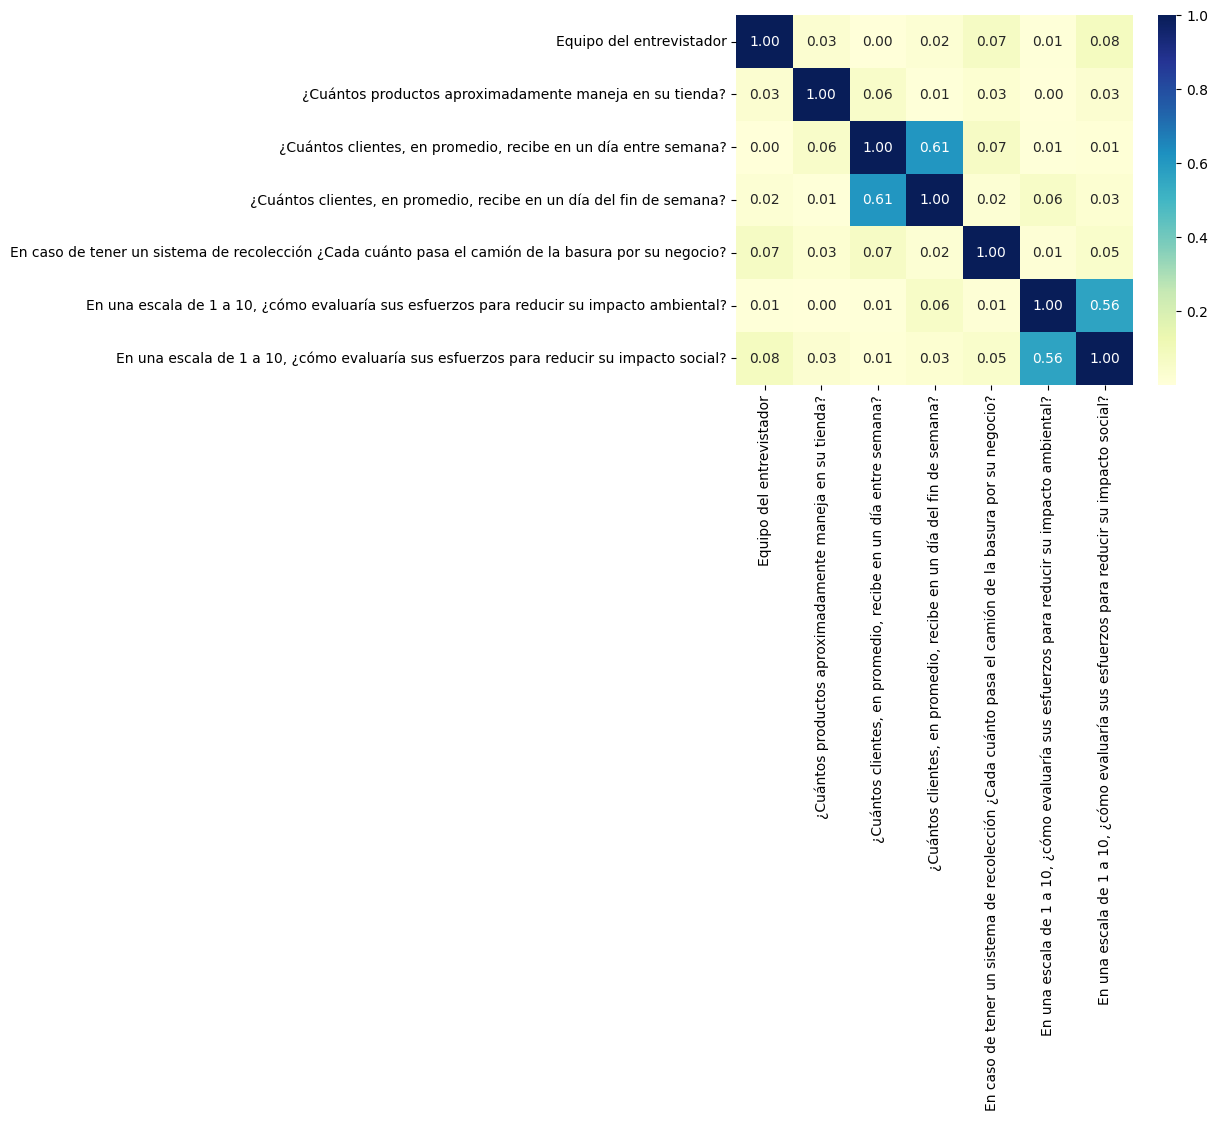

In [45]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")
Heat_Map

Regresión 1

<Axes: xlabel='¿Cuántos clientes, en promedio, recibe en un día del fin de semana?', ylabel='¿Cuántos clientes, en promedio, recibe en un día entre semana?'>

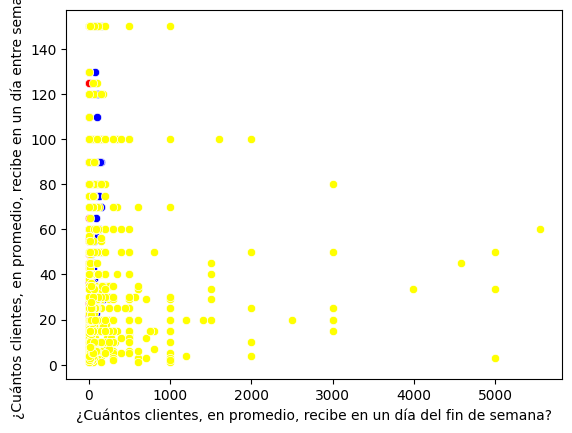

In [53]:
sns.scatterplot(x='¿Cuántos clientes, en promedio, recibe en un día del fin de semana?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="blue", data=data3)
sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="red", data=data3)
sns.scatterplot(x='¿Cuántos productos aproximadamente maneja en su tienda?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="yellow", data=data3)

In [47]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data3[['En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', '¿Cuántos clientes, en promedio, recibe en un día del fin de semana?','¿Cuántos productos aproximadamente maneja en su tienda?']]
Var_Dep= data3['¿Cuántos clientes, en promedio, recibe en un día entre semana?']

In [48]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

In [50]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?',
        '¿Cuántos clientes, en promedio, recibe en un día del fin de semana?',
        '¿Cuántos productos aproximadamente maneja en su tienda?'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.51548722, 0.52220619, 0.00367228]),
 'rank_': 3,
 'singular_': array([16074.9354981 ,  1124.1246648 ,   103.09695599]),
 'intercept_': 9.474758649867276}

**Modelo matemático: y= 0.51548722x1 + 0.52220619x2 + 0.00367228x3 + 9.474758649867276**





In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data3[['En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', '¿Cuántos clientes, en promedio, recibe en un día del fin de semana?','¿Cuántos productos aproximadamente maneja en su tienda?']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data3.insert(0, 'Predicciones_¿Cuántos clientes, en promedio, recibe en un día entre semana?', y_pred)
data3

<Axes: xlabel='¿Cuántos clientes, en promedio, recibe en un día del fin de semana?', ylabel='¿Cuántos clientes, en promedio, recibe en un día entre semana?'>

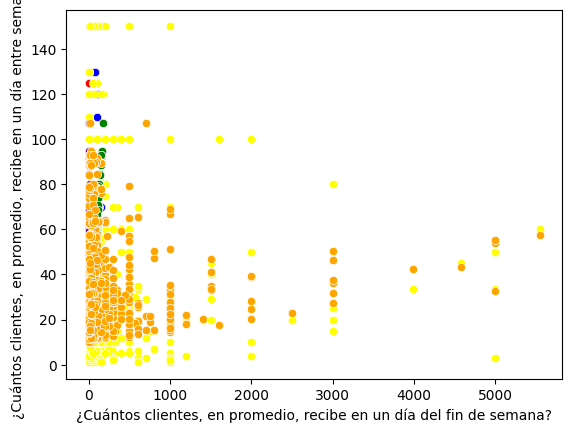

In [61]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='¿Cuántos clientes, en promedio, recibe en un día del fin de semana?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="blue", data=data3)
sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="red", data=data3)
sns.scatterplot(x='¿Cuántos productos aproximadamente maneja en su tienda?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="yellow", data=data3)

sns.scatterplot(x='¿Cuántos clientes, en promedio, recibe en un día del fin de semana?', y='Predicciones_¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="green", data=data3)
sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='Predicciones_¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="purple", data=data3)
sns.scatterplot(x='¿Cuántos productos aproximadamente maneja en su tienda?', y='Predicciones_¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="orange", data=data3)


<Axes: xlabel='¿Cuántos clientes, en promedio, recibe en un día del fin de semana?', ylabel='¿Cuántos clientes, en promedio, recibe en un día entre semana?'>

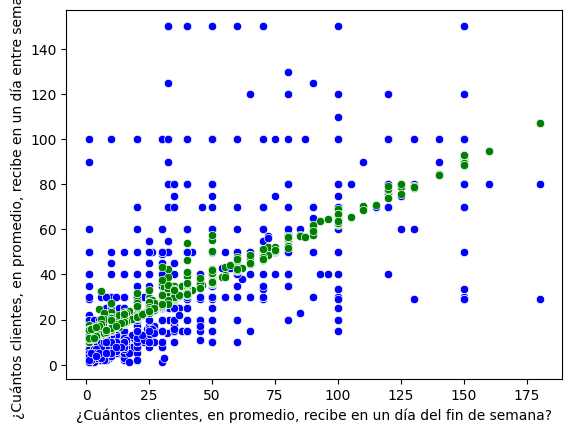

In [57]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='¿Cuántos clientes, en promedio, recibe en un día del fin de semana?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="blue", data=data3)
#sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="red", data=data3)
#sns.scatterplot(x='¿Cuántos productos aproximadamente maneja en su tienda?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="yellow", data=data3)

sns.scatterplot(x='¿Cuántos clientes, en promedio, recibe en un día del fin de semana?', y='Predicciones_¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="green", data=data3)
#sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='Predicciones_¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="pink", data=data3)
#sns.scatterplot(x='¿Cuántos productos aproximadamente maneja en su tienda?', y='Predicciones_¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="orange", data=data3)


<Axes: xlabel='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', ylabel='¿Cuántos clientes, en promedio, recibe en un día entre semana?'>

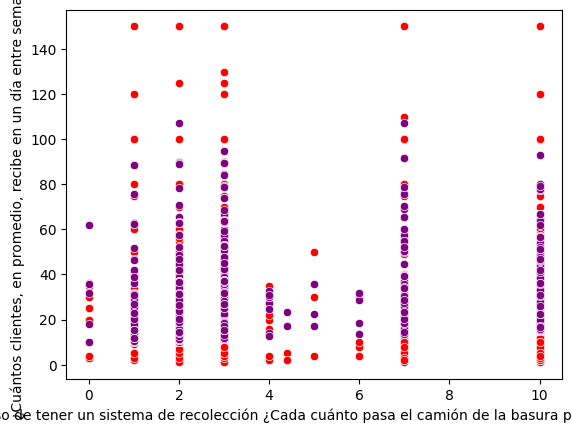

In [60]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#sns.scatterplot(x='¿Cuántos clientes, en promedio, recibe en un día del fin de semana?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="blue", data=data3)
sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="red", data=data3)
#sns.scatterplot(x='¿Cuántos productos aproximadamente maneja en su tienda?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="yellow", data=data3)

#sns.scatterplot(x='¿Cuántos clientes, en promedio, recibe en un día del fin de semana?', y='Predicciones_¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="green", data=data3)
sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='Predicciones_¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="purple", data=data3)
#sns.scatterplot(x='¿Cuántos productos aproximadamente maneja en su tienda?', y='Predicciones_¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="orange", data=data3)


<Axes: xlabel='¿Cuántos productos aproximadamente maneja en su tienda?', ylabel='¿Cuántos clientes, en promedio, recibe en un día entre semana?'>

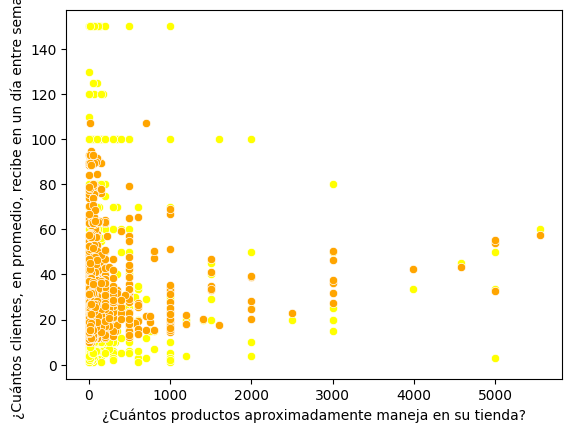

In [59]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#sns.scatterplot(x='¿Cuántos clientes, en promedio, recibe en un día del fin de semana?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="blue", data=data3)
#sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="red", data=data3)
sns.scatterplot(x='¿Cuántos productos aproximadamente maneja en su tienda?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="yellow", data=data3)

#sns.scatterplot(x='¿Cuántos clientes, en promedio, recibe en un día del fin de semana?', y='Predicciones_¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="green", data=data3)
#sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='Predicciones_¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="pink", data=data3)
sns.scatterplot(x='¿Cuántos productos aproximadamente maneja en su tienda?', y='Predicciones_¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="orange", data=data3)


In [62]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.37471190172985325

In [63]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6121371592460739

Regresión 2

In [ ]:
sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='Equipo del entrevistador', color="blue", data=data3)
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='Equipo del entrevistador', color="red", data=data3)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Inde#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data3[['En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', 'En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?']])
y_predp= data3[['En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', 'En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?']]
Var_Dep= data3['Equipo del entrevistador']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

**Modelo matemático: y= 0.02988918x1 - 0.04292845x2 + 3.0322074733860407**

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data3[['En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', 'En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data3.insert(0, 'Predicciones_Equipo del entrevistador', y_pred)
data3

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='Equipo del entrevistador', color="blue", data=data3)
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='Equipo del entrevistador', color="red", data=data3)

sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='Predicciones_Equipo del entrevistador', color="pink", data=data3)
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='Predicciones_Equipo del entrevistador', color="yellow", data=data3)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

Regresión 3

In [ ]:
sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='Equipo del entrevistador', color="blue", data=data3)
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='Equipo del entrevistador', color="red", data=data3)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data3[['En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', 'En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?']]
Var_Dep= data3['Equipo del entrevistador']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

**Modelo matemático: y= 0.02988918x1 - 0.04292845x2 + 3.0322074733860407**


In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data3[['En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', 'En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data3.insert(0, 'Predicciones_Equipo del entrevistador', y_pred)
data3

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='Equipo del entrevistador', color="blue", data=data3)
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='Equipo del entrevistador', color="red", data=data3)

sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='Predicciones_Equipo del entrevistador', color="pink", data=data3)
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='Predicciones_Equipo del entrevistador', color="yellow", data=data3)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

Regresión 4

In [ ]:
sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='Equipo del entrevistador', color="blue", data=data3)
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='Equipo del entrevistador', color="red", data=data3)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data3[['En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', 'En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?']]
Var_Dep= data3['Equipo del entrevistador']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

**Modelo matemático: y= 0.02988918x1 - 0.04292845x2 + 3.0322074733860407**


In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data3[['En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', 'En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data3.insert(0, 'Predicciones_Equipo del entrevistador', y_pred)
data3

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='Equipo del entrevistador', color="blue", data=data3)
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='Equipo del entrevistador', color="red", data=data3)

sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='Predicciones_Equipo del entrevistador', color="pink", data=data3)
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='Predicciones_Equipo del entrevistador', color="yellow", data=data3)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

Regresión 5

In [ ]:
sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='Equipo del entrevistador', color="blue", data=data3)
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='Equipo del entrevistador', color="red", data=data3)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data3[['En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', 'En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?']]
Var_Dep= data3['Equipo del entrevistador']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

**Modelo matemático: y= 0.02988918x1 - 0.04292845x2 + 3.0322074733860407**


In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data3[['En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', 'En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data3.insert(0, 'Predicciones_Equipo del entrevistador', y_pred)
data3

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='Equipo del entrevistador', color="blue", data=data3)
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='Equipo del entrevistador', color="red", data=data3)

sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='Predicciones_Equipo del entrevistador', color="pink", data=data3)
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='Predicciones_Equipo del entrevistador', color="yellow", data=data3)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(data3)